#### Consigna
Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
Material TPs/ TP3/images a partir del template Material TPs/TP3/template
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca multi.png con el mismo témplate del ítem 1
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.
Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

In [140]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Punto 3 - algoritmo para detectar todas las imagenes de la carpeta TPs/TP3/images 

In [139]:
def template_matching(template_path, image_path, size, alpha, 
                      block_size, const, method, threshold = 0.99):
    """Performs template matching between a template and an image.

    Args:
        template_path (str): path to template image.
        image_path (str): path to image to match.
        size (tuple): height and width to resize the template 
            (in order to improve the matching).
        alpha (float): alpha param for manage image constrast.
        block_size (int): block_size param for adaptative threshold.
        const (float): const param for adaptative threshold.
        method (object): distance function for openCV's template matching.
        threshold (float, float): threshold for selecting best match/matches
            in template matching algorithm. Defaults to 0.99.
    """
    # Import template & image
    img_rgb = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)

    # Resize image based on size param
    template_resized = cv2.resize(template, size)
    w, h = template_resized.shape[::-1]
    
    # Convert to gray scale and apply constrast + threshold
    img_gray_preprocessed = cv2.convertScaleAbs(img_gray, alpha=alpha)
    img_gray_preprocessed = cv2.adaptiveThreshold(
        img_gray_preprocessed,
        255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        block_size,
        const
    )

    # Apply Template Matching algorithm and normalize output
    res = cv2.matchTemplate(img_gray_preprocessed, template_resized, method)
    res = cv2.normalize(res, None, 0, 1, cv2.NORM_MINMAX)

    # Find matches based on threshold (0 to 1)
    loc = np.where(res >= threshold)

    # Highlight the match or matches with a red rectangle
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    
    # Plot
    plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
    plt.title('Detección a nivel de confianza 99%')
    plt.axis('off')
    plt.show()

#### Puntos 1 y 2: deteccion de un logo y multiples logos en una misma imagen

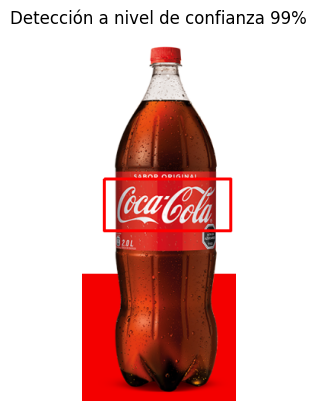

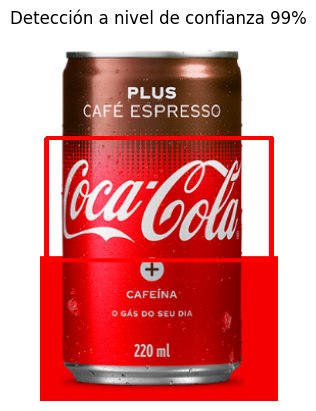

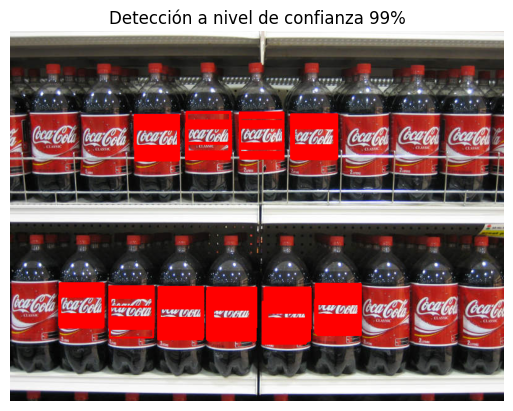

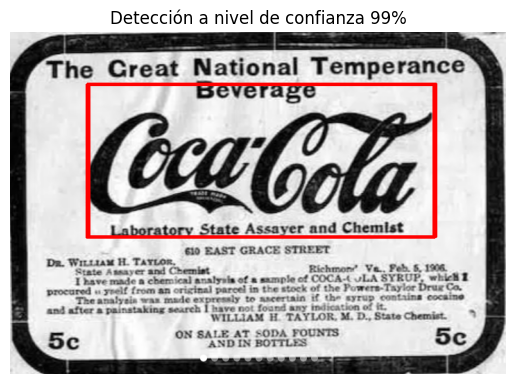

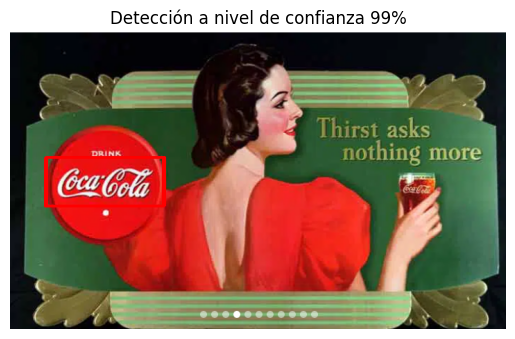

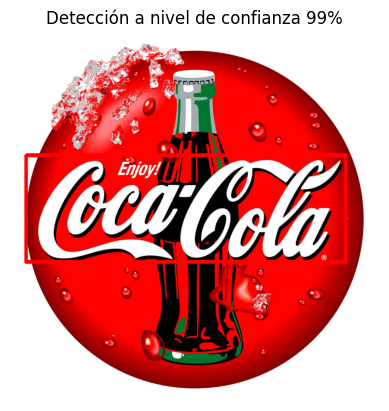

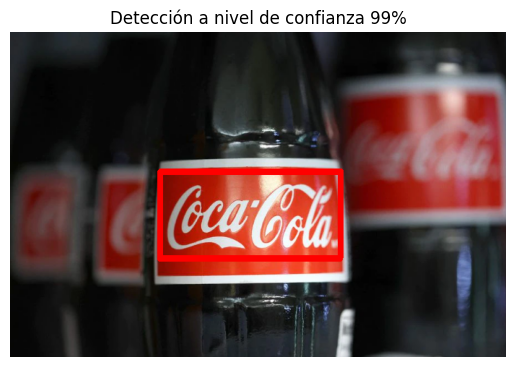

In [146]:
template_path = r"Material_TPs/TP3/template/pattern.png"

params = [
    {"image_path":r"Material_TPs/TP3/images/coca_logo_1.png", "size":(170, 70), "alpha":1, 
     "block_size":51, "const":2, "method":cv2.TM_SQDIFF},
    {"image_path":r"Material_TPs/TP3/images/coca_logo_2.png", "size":(220, 120), "alpha":1, 
     "block_size":51, "const":4, "method":cv2.TM_SQDIFF},
    {"image_path":r"Material_TPs/TP3/images/coca_multi.png", "size":(70, 50), "alpha":4, 
     "block_size":51, "const":1, "method":cv2.TM_CCORR_NORMED},
    {"image_path":r"Material_TPs/TP3/images/coca_retro_1.png", "size":(500, 220), "alpha":1, 
     "block_size":51, "const":3, "method":cv2.TM_CCOEFF},
    {"image_path":r"Material_TPs/TP3/images/coca_retro_2.png", "size":(170, 70), "alpha":1, 
     "block_size":51, "const":3, "method":cv2.TM_SQDIFF},
    {"image_path":r"Material_TPs/TP3/images/COCA-COLA-LOGO.jpg", "size":(1200, 400), "alpha":1, 
     "block_size":51, "const":3, "method":cv2.TM_SQDIFF},
    {"image_path":r"Material_TPs/TP3/images/logo_1.png", "size":(250, 120), "alpha":1, 
     "block_size":51, "const":3, "method":cv2.TM_SQDIFF}
     ]

for ele in params:
    template_matching(template_path, ele["image_path"], ele["size"], ele["alpha"], 
                      ele["block_size"], ele["const"], ele["method"])